In [1]:
import pandas as pd
from google.colab import drive
import numpy as np

drive.mount("/content/drive")

data=pd.read_csv("/content/drive/MyDrive/NeutralNetwork/train.csv")

Mounted at /content/drive


In [2]:
data=np.array(data)
np.random.shuffle(data)

data_test=data[:1000]
data_X=data_test.T[1:]/255.
data_y=data_test.T[0]

data=data[1000:]
data

array([[7, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

In [3]:
data=data.T
data

array([[7, 3, 1, ..., 5, 3, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
n,m=data.shape
Ytrain=data[0]
Xtrain=data[1:]
Ytrain

array([7, 3, 1, ..., 5, 3, 2])

In [5]:
X=Xtrain/255

In [6]:
X.max()

1.0

In [7]:
Xtrain=X
Xtrain.shape

(784, 41000)

In [8]:
Xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
Ytrain=Ytrain.T

Truth Value: 7


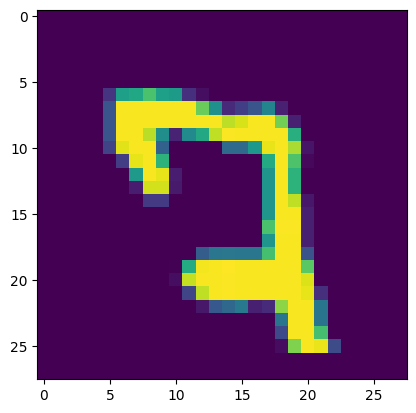

In [10]:
from matplotlib import pyplot as plt
plt.imshow(Xtrain.T[0].reshape((28,28)))
print("Truth Value:",Ytrain[0])


In [15]:
def init_para():

  W_1 = np.random.rand(10,784) - 0.5
  B_1 = np.random.rand(10,1) - 0.5
  W_2 = np.random.rand(10,10) - 0.5
  B_2 = np.random.rand(10,1) - 0.5
  return W_1,B_1,W_2,B_2
def ReLu(Z_1):
    A = np.maximum(Z_1,0)
    return A

def softmax(Z):

    A=np.exp(Z)/ sum(np.exp(Z))
    return A
def forward_pass(W_1,W_2,B_1,B_2,X):

  Z_1 = W_1.dot(X)  + B_1
  # print(Z_1)
  A_1 = ReLu(Z_1)

  Z_2 = W_2.dot(A_1)  + B_2

  A_2 = softmax(Z_2)

  return Z_1,A_1,Z_2,A_2


def oneHotY(Y):

  oneShot=np.zeros((Y.size,Y.max()+1))
  oneShot[np.arange(Y.size),Y]=1
  oneShot=oneShot.T
  return oneShot
def dervReLu(X):
  return X  > 0


def back_Prop(Z_1, A_1, Z_2, A_2, W_1, W_2, X, Y):
  one_shotY = oneHotY(Y)
  m=Y.shape[0]

  print(Z_1.shape, A_1.shape, Z_2.shape, A_2.shape, W_1.shape, W_2.shape, X.shape, Y.shape)
  dZ2 = A_2 - one_shotY

  dW2 = 1/m * dZ2.dot(A_1.T)
  dB2 = 1/m * np.sum(dZ2)
  dZ1 = W_2.T.dot(dZ2)*dervReLu(Z_1)

  dW1 = 1/m * dZ1.dot(X.T)
  dB1 = 1/m * np.sum(dZ1)
  return dW1,dW2,dB1,dB2


def update_pra(W_1,B_1,W_2,B_2,dW1,dW2,dB1,dB2,a):
  print(W_1.shape,W_2.shape,B_1.shape,B_2.shape)
  W_1=W_1 - a * dW1
  B_1=B_1 - a * dB1
  W_2=W_2 - a * dW2
  B_2=B_2 - a * dB2
  print(W_1.shape,W_2.shape,B_1.shape,B_2.shape)
  return W_1,B_1,W_2,B_2

def get_predict(A_2):
  return np.argmax(A_2,0)
def get_accuracy(pred,X):
  return np.sum(pred==X)/X.size

def gradient_pred(X,Y,epoch,a):
  W_1,B_1,W_2,B_2 = init_para()

  for i in range(epoch):

    Z_1,A_1,Z_2,A_2 = forward_pass(W_1,W_2,B_1,B_2,X)
    dW1,dW2,dB1,dB2 = back_Prop(Z_1, A_1, Z_2, A_2, W_1, W_2, X, Y)
    W_1,B_1,W_2,B_2 = update_pra(W_1,B_1,W_2,B_2,dW1,dW2,dB1,dB2,a)
    print("Iteration  : ",i)
    print("Predicted :",get_predict(A_2))
    print("True Value :",Y)
    print("Accuracy :",get_accuracy(get_predict(A_2),Y))

  return W_1,B_1,W_2,B_2








In [16]:
W_1,B_1,W_2,B_2=gradient_pred(Xtrain,Ytrain,500,0.2)

(10, 41000) (10, 41000) (10, 41000) (10, 41000) (10, 784) (10, 10) (784, 41000) (41000,)
(10, 784) (10, 10) (10, 1) (10, 1)
(10, 784) (10, 10) (10, 1) (10, 1)
Iteration  :  0
Predicted : [1 1 1 ... 1 1 8]
True Value : [7 3 1 ... 5 3 2]
Accuracy : 0.10595121951219512
(10, 41000) (10, 41000) (10, 41000) (10, 41000) (10, 784) (10, 10) (784, 41000) (41000,)
(10, 784) (10, 10) (10, 1) (10, 1)
(10, 784) (10, 10) (10, 1) (10, 1)
Iteration  :  1
Predicted : [1 1 1 ... 1 1 8]
True Value : [7 3 1 ... 5 3 2]
Accuracy : 0.11619512195121952
(10, 41000) (10, 41000) (10, 41000) (10, 41000) (10, 784) (10, 10) (784, 41000) (41000,)
(10, 784) (10, 10) (10, 1) (10, 1)
(10, 784) (10, 10) (10, 1) (10, 1)
Iteration  :  2
Predicted : [1 1 1 ... 1 1 8]
True Value : [7 3 1 ... 5 3 2]
Accuracy : 0.13204878048780488
(10, 41000) (10, 41000) (10, 41000) (10, 41000) (10, 784) (10, 10) (784, 41000) (41000,)
(10, 784) (10, 10) (10, 1) (10, 1)
(10, 784) (10, 10) (10, 1) (10, 1)
Iteration  :  3
Predicted : [1 1 1 ... 1

In [17]:
def make_prediction(W_1,B_1,W_2,B_2,X_dev):
  _,_,_,A2=forward_pass(W_1,W_2,B_1,B_2,X_dev)

  return np.argmax(A2,0)

def test_prediction(X,Y):
  print(X.shape,Y.shape)
  return np.sum(X==Y)/X.size
pred=make_prediction(W_1,B_1,W_2,B_2,data_X)
print(test_prediction(pred,data_y))


(1000,) (1000,)
0.885


Prediciton : 1


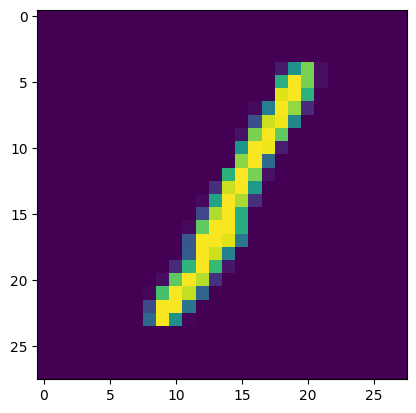

In [20]:
def prediction(X,Y):
  for i in range(X.size):
    print("Prediciton :",X[i])
    plt.imshow(Y[i].reshape((28,28)))
    break
prediction(pred,data_X.T)

In [24]:
with open("/content/drive/MyDrive/NeutralNetwork/Weights.txt","w") as f:
  f.write("W1:"+str(W_1)+"\t"+"W2:"+str(W_2)+"\t"+"B1:"+str(B_1)+"\t"+"B1:"+str(B_2))
  f.close()